<a href="https://colab.research.google.com/github/amandaay/BigDataAnalytics/blob/main/CS7280proj3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download dataset from kaggle

## feel free to skip this step
### By obtaining csv file from https://storage.googleapis.com/cs7280-proj3/redfin.csv instead. This saves time from downloading the data again.

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [ ]:
# Step 4: Set appropriate permissions for the Kaggle API token
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Step 5: Download the dataset
!kaggle datasets download -d vincentvaseghi/us-cities-housing-market-data

 99% 0.99G/1.01G [00:26<00:00, 57.0MB/s]
100% 1.01G/1.01G [00:26<00:00, 40.4MB/s]


In [ ]:
# Step 6: Unzip the dataset
!unzip us-cities-housing-market-data.zip

Archive:  us-cities-housing-market-data.zip
  inflating: city_market_tracker.tsv000  


## Convert tsv file to csv file format

In [ ]:
# Step 7: Import necessary libraries
import pandas as pd

In [ ]:
csv_table = pd.read_table('city_market_tracker.tsv000', sep='\t')

In [ ]:
csv_table.to_csv('redfin.csv', index=False)

In [ ]:
import os
print(os.getcwd())

In [ ]:
!mv redfin.csv /content/drive/MyDrive

# Install Pyspark and appropriate files

In [ ]:
#@title Install all the appropriate packages

!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq

In [2]:
#@title Import and create Spark Context

# Let's import the libraries we will need
import itertools

import pyspark
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

# create the session
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()

In [3]:
from pyspark import SparkFiles

In [4]:
from pyspark.sql.functions import year, col

In [5]:
# URL of the CSV file
url = "https://storage.googleapis.com/cs7280-proj3/redfin.csv"

In [6]:
sc.addFile(url)

In [7]:
path = SparkFiles.get("redfin.csv")

In [8]:
df = spark.read.csv("file://"+ path, header=True, inferSchema=True)

In [9]:
df.show()

+------------+----------+---------------+-----------+--------------+--------+----------------------+--------------------+------------------+-------------+----------+--------------------+----------------+-----------------+---------------------+---------------------+-----------------+---------------------+---------------------+------------------+-------------------+-------------------+------------------+--------------------+--------------------+----------+-------------------+-------------------+-------------+-------------------+-------------------+------------+-------------------+-------------------+---------+-------------------+-------------------+----------------+--------------------+--------------------+----------+--------------+--------------+------------------+--------------------+--------------------+------------------+-------------------+-------------------+------------------+-------------------+-------------------+-----------------------+---------------------------+--------------

In [10]:
distinct_states_df = df.select(col("state"), col("state_code")).distinct()

In [11]:
distinct_states_df.show(distinct_states_df.count(), truncate=False)

+--------------+----------+
|state         |state_code|
+--------------+----------+
|Mississippi   |MS        |
|South Dakota  |SD        |
|Utah          |UT        |
|Kentucky      |KY        |
|California    |CA        |
|Nebraska      |NE        |
|New Hampshire |NH        |
|Delaware      |DE        |
|Minnesota     |MN        |
|Columbia      |DC        |
|North Carolina|NC        |
|Nevada        |NV        |
|Washington    |WA        |
|Louisiana     |LA        |
|Idaho         |ID        |
|Wyoming       |WY        |
|New Mexico    |NM        |
|Maine         |ME        |
|Tennessee     |TN        |
|Colorado      |CO        |
|Arizona       |AZ        |
|Wisconsin     |WI        |
|Oregon        |OR        |
|Alabama       |AL        |
|Kansas        |KS        |
|Florida       |FL        |
|Pennsylvania  |PA        |
|North Dakota  |ND        |
|New York      |NY        |
|South Carolina|SC        |
|Texas         |TX        |
|Ohio          |OH        |
|Iowa          |IA  

In [12]:
sold_inventory = df.select(year("period_begin").alias("year"), "homes_sold", "inventory", "state")

In [13]:
sold_inventory = sold_inventory.withColumn("difference", col("inventory") - col("homes_sold"))

In [14]:
sold_inventory = sold_inventory.na.drop(subset=["difference"])

In [15]:
sold_inventory.show()

+----+----------+---------+-------------+----------+
|year|homes_sold|inventory|        state|difference|
+----+----------+---------+-------------+----------+
|2021|      20.0|     69.0|   New Jersey|      49.0|
|2019|       3.0|      7.0|         Ohio|       4.0|
|2020|      11.0|     14.0|Massachusetts|       3.0|
|2018|       6.0|     15.0|     Oklahoma|       9.0|
|2013|       4.0|     19.0|     Kentucky|      15.0|
|2021|       3.0|     15.0|   New Jersey|      12.0|
|2021|       9.0|      9.0|         Ohio|       0.0|
|2012|       1.0|      2.0| South Dakota|       1.0|
|2012|       1.0|      6.0|    Wisconsin|       5.0|
|2017|      10.0|     13.0| Pennsylvania|       3.0|
|2016|      11.0|     35.0| Pennsylvania|      24.0|
|2022|       6.0|     14.0|  Mississippi|       8.0|
|2013|       7.0|     11.0|       Oregon|       4.0|
|2023|       7.0|     38.0|         Ohio|      31.0|
|2017|       2.0|      9.0|      Indiana|       7.0|
|2012|      33.0|    176.0|     Illinois|     

In [16]:
sold_inventory = sold_inventory.rdd

In [17]:
sold_inventory.take(5)

[Row(year=2021, homes_sold=20.0, inventory=69.0, state='New Jersey', difference=49.0),
 Row(year=2019, homes_sold=3.0, inventory=7.0, state='Ohio', difference=4.0),
 Row(year=2020, homes_sold=11.0, inventory=14.0, state='Massachusetts', difference=3.0),
 Row(year=2018, homes_sold=6.0, inventory=15.0, state='Oklahoma', difference=9.0),
 Row(year=2013, homes_sold=4.0, inventory=19.0, state='Kentucky', difference=15.0)]

In [18]:
# sort by year and sort by differences
sorted_sold_inventory = sold_inventory.sortBy(lambda x: (x[0], -x[4]))

In [19]:
sorted_sold_inventory.take(5)

[Row(year=2012, homes_sold=1491.0, inventory=12746.0, state='Illinois', difference=11255.0),
 Row(year=2012, homes_sold=1347.0, inventory=12431.0, state='Illinois', difference=11084.0),
 Row(year=2012, homes_sold=1921.0, inventory=12845.0, state='Illinois', difference=10924.0),
 Row(year=2012, homes_sold=2089.0, inventory=12699.0, state='Illinois', difference=10610.0),
 Row(year=2012, homes_sold=2392.0, inventory=12519.0, state='Illinois', difference=10127.0)]

In [20]:
grouped_by_year_state = sorted_sold_inventory.map(lambda x: ((x[0], x[3]), (x[4], 1))).reduceByKey(lambda x, y: (x[0]+y[0], x[1] + y[1])).mapValues(lambda x: (x[0] / x[1])).map(lambda x:( x[0][0], x[0][1],x[1]))

In [21]:
grouped_by_year_state.take(10)

[(2012, 'Maryland', 33.658946099535044),
 (2012, 'Louisiana', 72.57026291931098),
 (2012, 'Alabama', 45.27746741154562),
 (2012, 'New Jersey', 36.703685835584714),
 (2013, 'Pennsylvania', 30.57774070286852),
 (2013, 'Arizona', 112.68355618109312),
 (2013, 'Massachusetts', 43.59352056869829),
 (2013, 'North Dakota', 6.866666666666666),
 (2014, 'Alaska', 59.370370370370374),
 (2014, 'Oregon', 37.20017444395988)]

In [22]:
# Take the top 5 differences for each year
top_5_by_year = grouped_by_year_state.groupBy(lambda x: x[0]).flatMapValues(lambda x: sorted(x, key=lambda y: -y[2])[:5]).map(lambda x: (x[0], x[1][1], x[1][2]))

In [23]:
top_5_by_year.collect()

[(2024, 'Columbia', 598.0),
 (2024, 'Florida', 82.82171762589928),
 (2024, 'Arizona', 80.69915764139591),
 (2024, 'Nevada', 65.14765100671141),
 (2024, 'Texas', 56.633861800777744),
 (2012, 'Columbia', 416.6166666666667),
 (2012, 'Nevada', 231.0623875224955),
 (2012, 'Arizona', 103.57126085935666),
 (2012, 'Florida', 97.99855545449681),
 (2012, 'South Carolina', 86.0811525244515),
 (2013, 'Columbia', 251.68333333333334),
 (2013, 'Nevada', 193.64629080118695),
 (2013, 'Arizona', 112.68355618109312),
 (2013, 'Florida', 94.00578864277855),
 (2013, 'Tennessee', 89.25253000706049),
 (2014, 'Columbia', 268.6333333333333),
 (2014, 'Nevada', 198.77325581395348),
 (2014, 'Arizona', 150.56583880037488),
 (2014, 'Florida', 94.19453924914676),
 (2014, 'South Carolina', 79.92690058479532),
 (2015, 'Columbia', 269.53333333333336),
 (2015, 'Nevada', 196.45076201641265),
 (2015, 'Arizona', 126.54255558050752),
 (2015, 'North Dakota', 111.125),
 (2015, 'Florida', 86.44953366310463),
 (2016, 'Columbia',

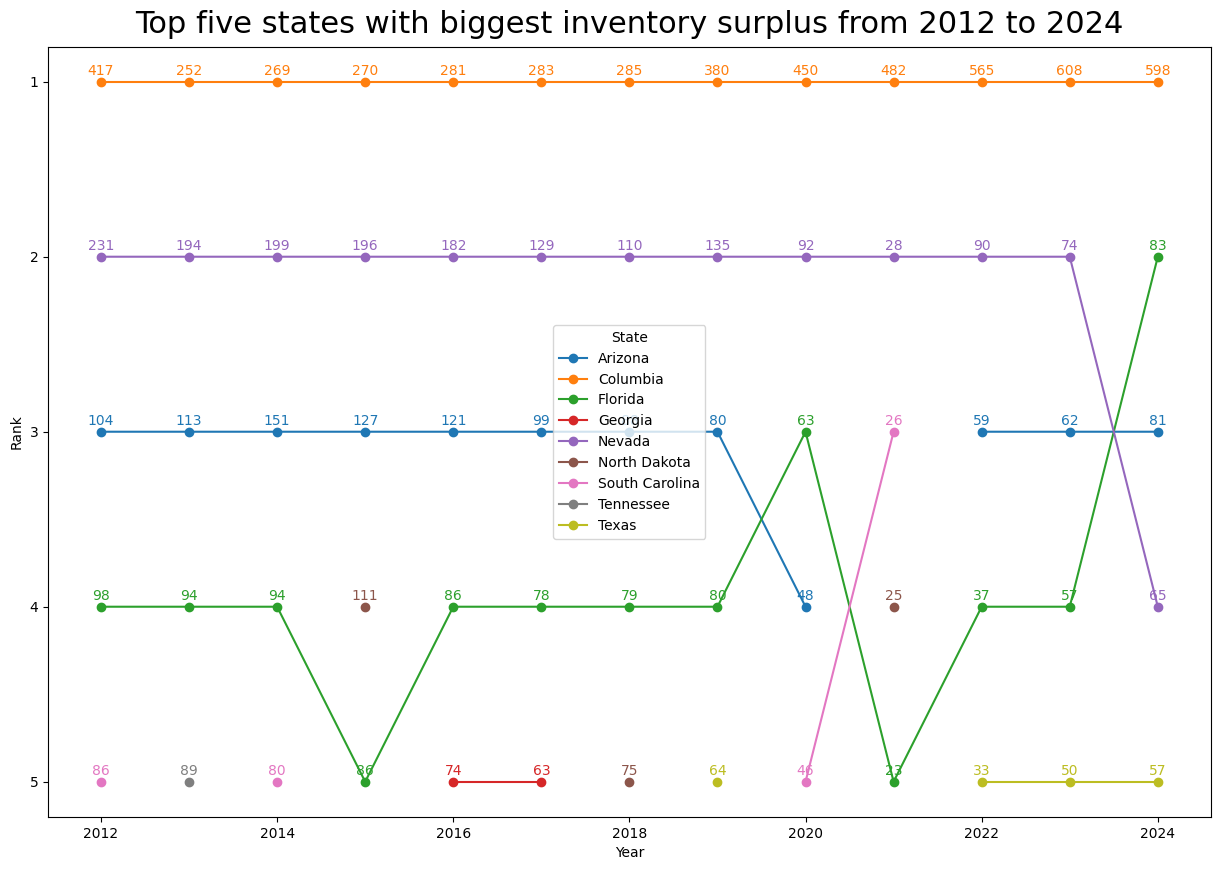

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Define your data
data = top_5_by_year.collect()

# Create DataFrame
df = pd.DataFrame(data, columns=['Year', 'State', 'Value'])

# Pivot the data to have states as columns and years as rows
pivot_df = df.pivot(index='Year', columns='State', values='Value')

# Rank the values in descending order (1 = highest value)
ranked_df = pivot_df.rank(axis=1, ascending=False, method='first')

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))
colors = plt.get_cmap('tab10')

for column in ranked_df.columns:
    line, = ax.plot(ranked_df.index, ranked_df[column], label=column, marker='o', color=colors(ranked_df.columns.tolist().index(column) / len(ranked_df.columns)))
    for idx in ranked_df.index:
        ax.annotate(f'{pivot_df.at[idx, column]:.0f}',
                    xy=(idx, ranked_df.at[idx, column]),
                    textcoords="offset points",
                    xytext=(0, 5),
                    ha='center',
                    fontsize=10,
                    color=line.get_color())

ax.set_xlabel('Year')
ax.set_ylabel('Rank')
ax.set_title('Top five states with biggest inventory surplus from 2012 to 2024', pad=10, fontsize=22)
ax.invert_yaxis()  # Invert y axis so that rank 1 is at the top
ax.legend(title='State')

# Set y-axis to show only integer ticks
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()

In [25]:
spark.stop()